In [2]:
import pickle
import numpy as np

In [3]:
with open('corpusParoleInutiliStemming.pkl', 'rb') as file:
    # Carica i dati dal file
    corpus_filtrato = pickle.load(file)
#len(corpus_filtrato[0])

In [4]:
with open('corpusParoleInutiliStemming_layer1.pkl', 'rb') as file:
    # Carica i dati dal file
    corpus_filtrato1 = pickle.load(file)
#len(corpus_filtrato[0])

In [5]:
with open("my_vecs_GennaioStemming.p", "rb") as file:
    word2Vec_model = pickle.load(file)

# Modello doc2vec
https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html

# Modello doc2vec basato su word embeddings (sembra non funzionare), vedi capitolo successivo

Layer3:

In [34]:
word_names = word2Vec_model.wv.index_to_key

word_vectors = [word2Vec_model.wv[word] for word in word_names]

corpus_filtrato_embedding = []
for doc in corpus_filtrato:
    doc_embedding = []
    for parola in doc:
        doc_embedding.append(word2Vec_model.wv[parola])
    corpus_filtrato_embedding.append(doc_embedding)
    

Layer1:

In [35]:
for doc in corpus_filtrato1:
    parole_valide = []
    for parola in doc:
        try:
            # Controlla se la parola è nel vocabolario word2vec
            word2Vec_model.wv[parola]
            parole_valide.append(parola)
        except KeyError:
            # Se la parola non è presente, passa alla prossima
            pass
    # Sostituisci il documento con la lista di parole valide
    doc.clear()
    doc.extend(parole_valide)
corpus_filtrato_embedding1 = []
for doc in corpus_filtrato1:
    doc_embedding = []
    for parola in doc:
        doc_embedding.append(word2Vec_model.wv[parola])
    corpus_filtrato_embedding1.append(doc_embedding)

In [13]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

il mio corpus è una lista di liste (documenti) che contengono le parole che sono np.array [[(np_array)..(np_array)]...[(np_array)..(np_array)]], devo trasformare gli np.array in liste per i codici futuri di gensim!:

In [36]:
corpus_filtrato_embedding = [[embedding.tolist() for embedding in doc] for doc in corpus_filtrato_embedding]

In [37]:
corpus_filtrato_embedding1 = [[embedding.tolist() for embedding in doc] for doc in corpus_filtrato_embedding1]

Ora ho che corpus_filtrato_embedding sono lista di liste di liste devo ottenere solo lista di liste:

NB: nel codice di gensim, lui prende un testo e lo tokenizza e applica doc2vec. Io avevo gli embedding ma qui sono inutili, facendo la somma delle componenti dell'embedding praticamente ottengo un token come doc2vec..

In [47]:
# Appiattisci la struttura nidificata delle liste
corpus_filtrato_embedding = [sum(doc, []) for doc in corpus_filtrato_embedding]# Appiattisci la struttura nidificata delle liste
corpus_filtrato_embedding1 = [sum(doc, []) for doc in corpus_filtrato_embedding1]

Devo avere i documenti in formato tagged: (layer3 è il mio train set e layer 1 il mio test)

In [51]:
# Creazione degli oggetti TaggedDocument per il set di addestramento
tagged_training_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_filtrato_embedding)]

# Creazione degli oggetti TaggedDocument per il set di test
tagged_test_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_filtrato_embedding1)]
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(tagged_training_corpus)

# Addestra il modello
model.train(tagged_training_corpus, total_examples=model.corpus_count, epochs=model.epochs)

Osservo che model.infer_vector necessita di stringhe e non word embeddings in input!

In [55]:
# Funzione per convertire un vettore in una stringa
def vector_to_string(vector):
    return ' '.join(str(num) for num in vector)

word_representation = vector_to_string(corpus_filtrato_embedding[0])

# Utilizza il metodo infer_vector() con la stringa come input
infer_vector = model.infer_vector(word_representation.split())

print(infer_vector)

[ 0.00050669 -0.00081176 -0.00299547 -0.00301067 -0.00988887 -0.00510821
 -0.00839686  0.00041138 -0.00734424  0.00503014 -0.00812845  0.00900625
  0.00584957  0.00618672  0.0031835   0.00888928  0.00650665 -0.00282407
 -0.00944455  0.00698833 -0.00170081  0.00139279  0.00785586  0.00772495
  0.00063546 -0.00096831 -0.00435975  0.00521972 -0.00939766 -0.00649627
 -0.00926481 -0.00099473 -0.00984083  0.00730255  0.00136502  0.00469491
 -0.00521897 -0.00817885  0.00746908 -0.00317931 -0.00164246 -0.00056783
  0.00762859 -0.0048925  -0.00555512  0.0020369  -0.00028397  0.00471714
  0.00793087  0.00703641]


NB: Questi pesi cosi bassi mi puzzano di errore, doc2vec non è pensato per lavorare su embedding ma sul testo direttamente, provo ora a passargli corpus_filtrato (senza embedding!)

# Doc2vec con corpus testuale (non embeddings)

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [7]:
# Creazione degli oggetti TaggedDocument per il set di addestramento
tagged_training_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_filtrato)]

# Creazione degli oggetti TaggedDocument per il set di test
tagged_test_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_filtrato1)]
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(tagged_training_corpus)

# Addestra il modello
model.train(tagged_training_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [8]:
vector = model.infer_vector(['bambin', 'sette', 'anni', 'è','stat', 'ricoverat', 'bronchite'])
print(vector)

[ 0.5043927  -0.02113818  0.03844694 -0.02566593  0.1897132   0.25536293
  0.22822797 -0.41208324 -0.325668    0.18609768 -0.10830057 -0.09678487
 -0.16011748  0.21044962 -0.38540792 -0.08565792 -0.19567713  0.3873251
 -0.46978608  0.18279906 -0.04452852  0.323318   -0.10208276 -0.50661737
 -0.2739433  -0.32321012 -0.05980114  0.18760103 -0.17465772  0.3207093
  0.33231598  0.26547807 -0.0133376   0.17998128  0.48621842  0.05471605
 -0.3115045   0.02849562 -0.185271    0.1578935  -0.13841349  0.0815039
 -0.0438793  -0.105897    0.0528791   1.2612736   0.21924624  0.30513903
  0.5213988  -0.2600126 ]


In [9]:
vector = model.infer_vector(corpus_filtrato1[0])
print(vector)

[ 1.0618926  -0.33370712 -1.0147434  -0.6613526  -0.13246992  0.55713254
 -2.27893     0.16823675 -0.6892759   2.7302299  -1.1607287  -1.5195011
 -0.83360314  0.91213256  0.1822742  -0.539087   -1.8374823  -1.9901404
 -0.26758352  0.2446425  -2.9167483   5.011672    0.01893744 -0.4741046
  2.224374   -1.5179155  -1.3569407  -0.8113933   1.9976469  -0.43924052
  3.3187437  -2.7705615   0.28645065  1.0748836   2.4727943   1.3042948
 -1.3324451  -0.22102323  2.3777654  -0.14533009 -0.25815654 -0.600481
  1.1158823   1.5999817  -1.3121417   0.77439624 -0.8177836  -1.5008936
  3.9620943   2.2207432 ]


In [15]:
type(vector)

numpy.ndarray

In [19]:
embedding_docs1 = []
for doc in corpus_filtrato1:
    vector = model.infer_vector(doc)
    embedding_docs1.append(vector)
embedding_docs1 = np.delete(embedding_docs1, 38, axis=0)  # devo rimuovere il documento sofa 4178(IT100830.xml) (il 39esimo della cartella)
embedding_docs1 = np.delete(embedding_docs1, 84, axis=0) #(l'86esimo ma ho gia rimosso uno quindi scala)


# CLustering doc2vec (sulla falsa riga di Embedding_UMLSandInfograph)
(il codice è quasi tutto copia incolla da quel notebook, inoltre cerco di seguire gli stessi passaggi per poter confrontare i risultati)

***
***
Analisi sugli embedding doc2vec
***
***

Varianza delle prime 2 componenti principali: [0.10500032 0.09115134]


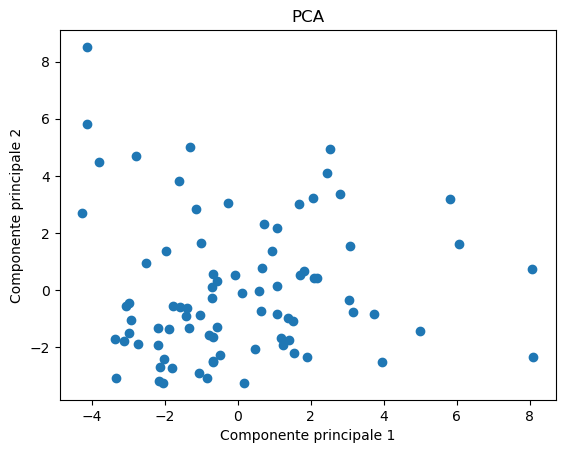

In [22]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Esegui PCA
pca = PCA(n_components=2)
embedding_docs1_pca = pca.fit_transform(embedding_docs1)

# Stampare la varianza delle prime 2 componenti principali
print("Varianza delle prime 2 componenti principali:", pca.explained_variance_ratio_)

# Visualizzare i risultati su un piano bidimensionale
plt.scatter(embedding_docs1_pca[:, 0], embedding_docs1_pca[:, 1])
plt.title('PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()

NB osservo che con doc2vec le prime due pc spiegano poco, quindi pca non va bene per vedere graficamente i risultati!

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


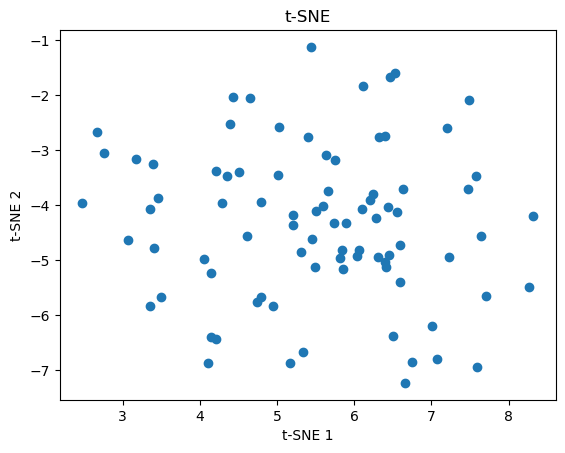

In [23]:
from sklearn.manifold import TSNE

# Esegui t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedding_docs1_tsne = tsne.fit_transform(embedding_docs1)

# Visualizzare i risultati su un piano bidimensionale
plt.scatter(embedding_docs1_tsne[:, 0], embedding_docs1_tsne[:, 1])
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

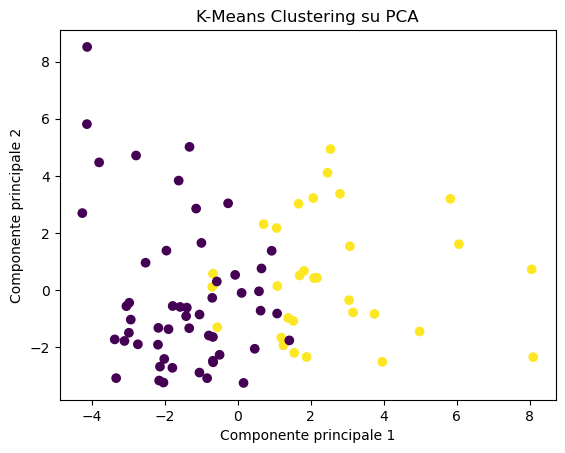

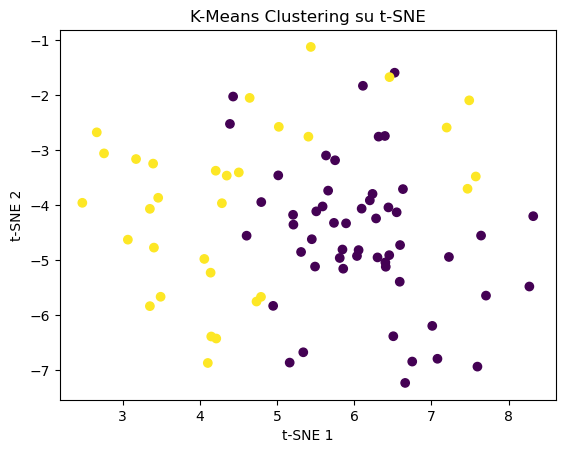

In [29]:
from sklearn.cluster import KMeans

# Esegui K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embedding_docs1)

# Visualizza i risultati su PCA
plt.scatter(embedding_docs1_pca[:, 0], embedding_docs1_pca[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering su PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.show()

# Visualizza i risultati su t-SNE
plt.scatter(embedding_docs1_tsne[:, 0], embedding_docs1_tsne[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering su t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

kmeanemblabels = kmeans.labels_

***
***
Analisi sulla SIMILARITA' (COSINE) degli embedding doc2vec
***
***

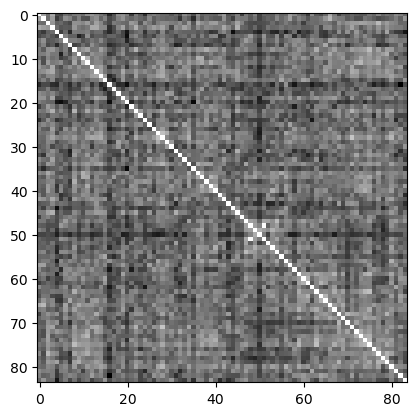

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcola la matrice di similarità coseno
similarity_matrix = cosine_similarity(emb1) # calcolo matrice di similarità documenti
import matplotlib.pyplot as plt

plt.imshow(similarity_matrix, cmap='gray')
plt.show()

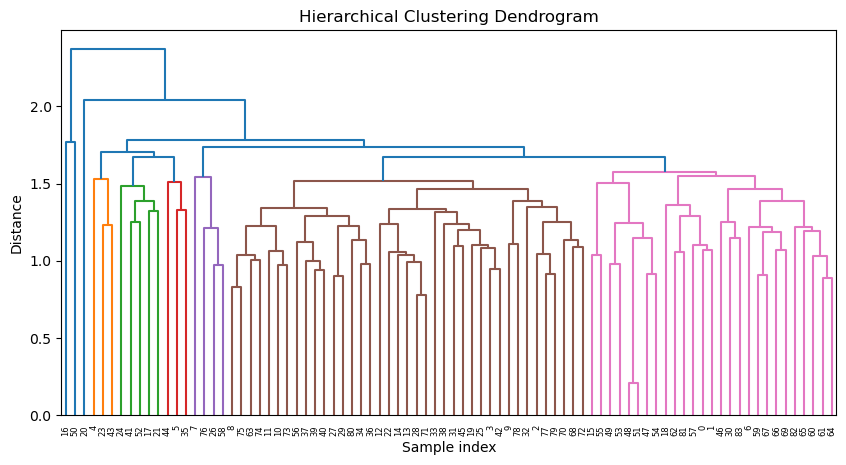

Numero di cluster: 5
Etichette dei cluster: [3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 0 2 3 3 4 2 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 2 3 2 2 3 3 3 3 3 1 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3]


C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


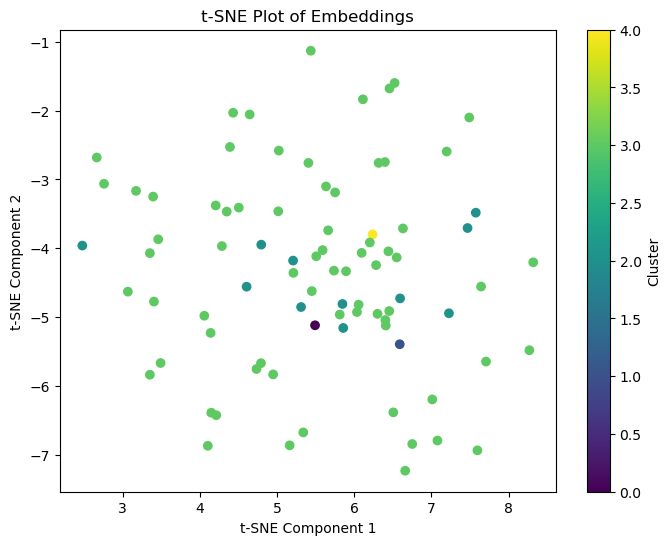

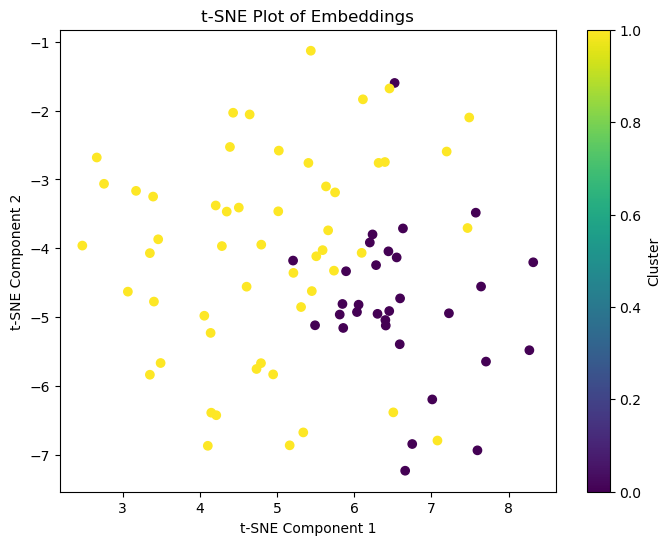

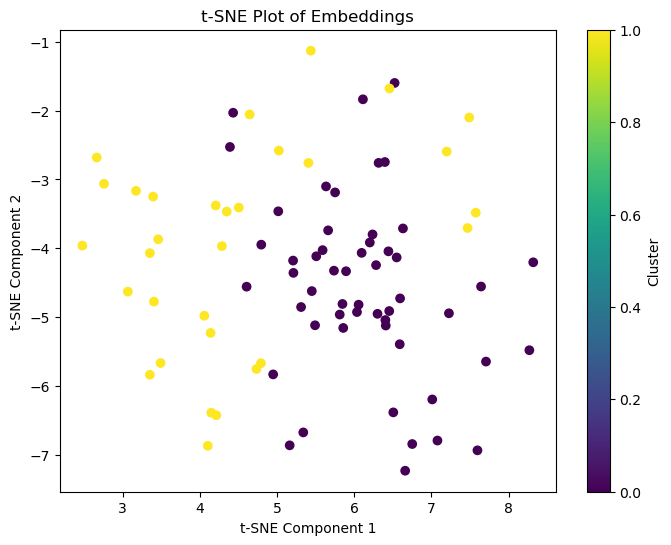

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calcola i collegamenti gerarchici basati sulla matrice di similarità
Z = linkage(similarity_matrix, method='average') # complete linkage mi sembra il migliore

# Plotta il dendrogramma per visualizzare la gerarchia dei cluster
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

# Determina i cluster tagliando il dendrogramma ad una certa altezza
max_d = 1.75  # Altezza di taglio del dendrogramma
clustersHierarchicaldoc2vec = fcluster(Z, max_d, criterion='distance')-1

# Stampa il numero di cluster e le etichette dei cluster
num_clusters = len(set(clustersHierarchicaldoc2vec))
print(f"Numero di cluster: {num_clusters}")
print("Etichette dei cluster:", clustersHierarchicaldoc2vec)

# Definizione del modello di clustering K-Means
kmeans = KMeans(n_clusters=2, init='k-means++')

# Addestramento del modello sulla matrice di similarità
kmeans.fit(similarity_matrix)

# clusters contiene le etichette dei cluster per ciascun punto dei dati
clustersKMEANSdoc2vec = kmeans.labels_

from sklearn.manifold import TSNE

# Calcola t-SNE sui tuoi embedding
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embedding_docs1)  # embeddings è la tua matrice di embedding

# Plotta i risultati
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clustersHierarchicaldoc2vec[:84], cmap='viridis')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clustersKMEANSdoc2vec[:84], cmap='viridis')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Confrontiamo i due cluster precedenti con i cluster ottenuti direttamente dagli embedding (no matrice di similarità ma emb1and3)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=kmeanemblabels[:84], cmap='viridis')
plt.title('t-SNE Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


osservo che il dendogram non è un granche, kmeans basato sulla matrice di similarità e non produce risultati simili

***
***
Rankings UMLS vs ranking INFOGRAPH vs doc2vec
***
***

In [35]:
# Indici degli elementi di ciascuna riga ordinati in base al valore della similarità
sorted_indices = np.argsort(-similarity_matrix, axis=1)  # Ordina in ordine decrescente

# Costruisci la matrice SIMrank
similarity_matrixrank = np.zeros_like(similarity_matrix, dtype=int)
for i in range(len(similarity_matrix)):
    similarity_matrixrank[i] = sorted_indices[i]

print(similarity_matrixrank)

[[ 0 66  3 ... 61 24 16]
 [ 1 66  0 ...  4 32 35]
 [ 2 77 36 ...  7 49 60]
 ...
 [81 62 47 ... 16 32 24]
 [82 64 12 ...  4 31 16]
 [83 39  1 ... 43 41  4]]


***
***
Confronto k-means clustering (visualizzato su tsne per tutti i possibili metodi) (K = 2)
***
***
Utilizzo sempre il tsne di doc2vec in ogni grafico per avere che tutti i punti siano nelle stesse posizioni!

C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\enduser\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


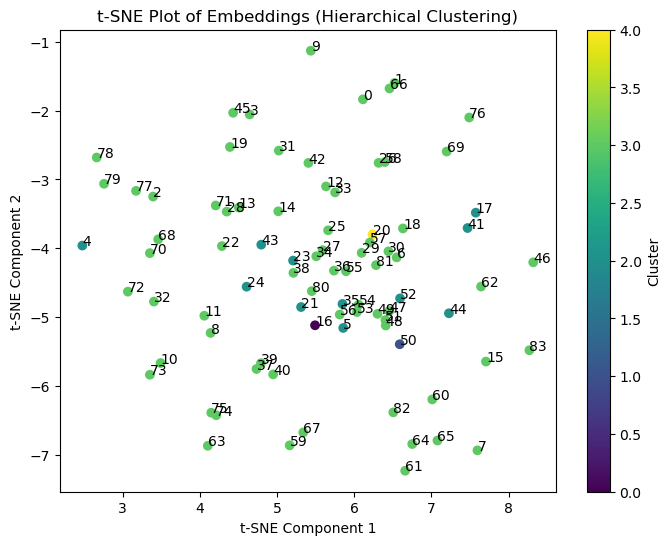

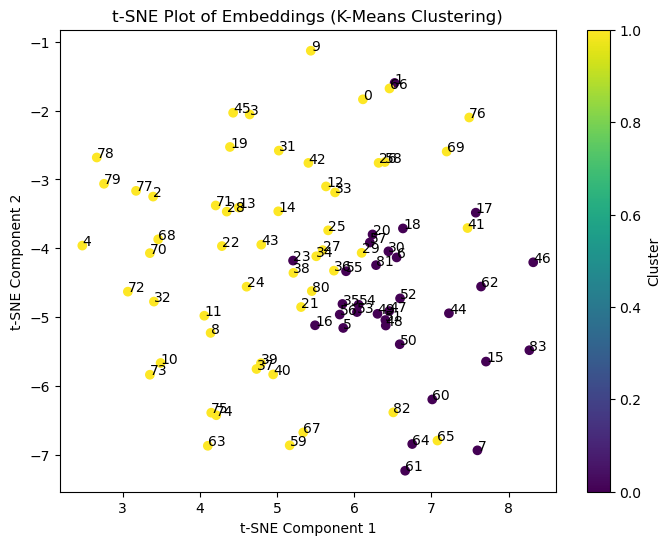

In [40]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embedding_docs1)  # embeddings è la tua matrice di embedding



# doc2vec similarity:



# Plotta i risultati per Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clustersHierarchicaldoc2vec[:84], cmap='viridis')
plt.title('t-SNE Plot of Embeddings (Hierarchical Clustering)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
# Annota i punti con gli indici
for i, txt in enumerate(range(84)):
    plt.annotate(txt, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))

plt.show()
# Plotta i risultati per K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clustersKMEANSdoc2vec[:84], cmap='viridis')
plt.title('t-SNE Plot of Embeddings (K-Means Clustering)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
# Annota i punti con gli indici
for i, txt in enumerate(range(84)):
    plt.annotate(txt, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
plt.show()